In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [3]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [4]:
figsize=(20, 5)
plt.style.use('ggplot')

In [5]:
data = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

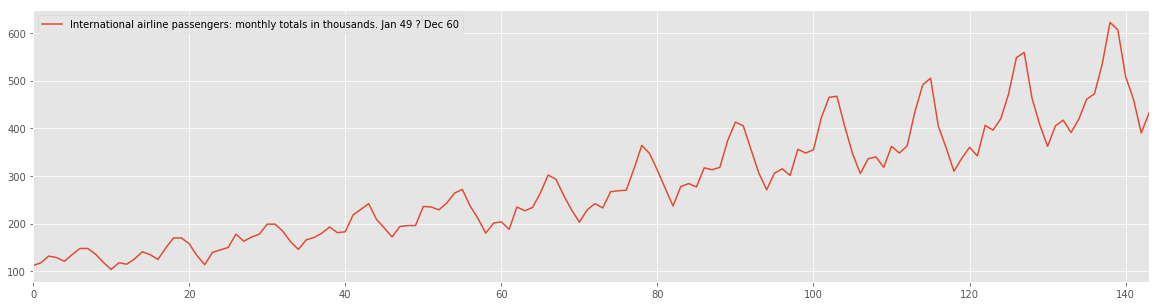

In [6]:
data.plot(figsize=figsize)

In [7]:
dataset = data.values

In [8]:
dataset = dataset.astype('float32')

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scale_dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
scale_train, scale_test = scale_dataset[0:train_size,:], scale_dataset[train_size:len(scale_dataset),:]
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# fix me
train = scale_train
test = scale_test
dataset = scale_dataset

# Train Loop

In [14]:
def train_model(train, test, look_back):
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=32, batch_size=1, verbose=2)
    
    return model

# Train With Scaling

In [15]:
m = train_model(scale_train, scale_test, 1)

Epoch 1/32
2s - loss: 0.0466
Epoch 2/32
0s - loss: 0.0256
Epoch 3/32
0s - loss: 0.0176
Epoch 4/32
0s - loss: 0.0157
Epoch 5/32
0s - loss: 0.0148
Epoch 6/32
0s - loss: 0.0142
Epoch 7/32
0s - loss: 0.0135
Epoch 8/32
0s - loss: 0.0127
Epoch 9/32
0s - loss: 0.0119
Epoch 10/32
0s - loss: 0.0110
Epoch 11/32
0s - loss: 0.0101
Epoch 12/32
0s - loss: 0.0089
Epoch 13/32
0s - loss: 0.0078
Epoch 14/32
0s - loss: 0.0066
Epoch 15/32
0s - loss: 0.0055
Epoch 16/32
0s - loss: 0.0046
Epoch 17/32
0s - loss: 0.0039
Epoch 18/32
0s - loss: 0.0031
Epoch 19/32
0s - loss: 0.0026
Epoch 20/32
0s - loss: 0.0024
Epoch 21/32
0s - loss: 0.0022
Epoch 22/32
0s - loss: 0.0021
Epoch 23/32
0s - loss: 0.0021
Epoch 24/32
0s - loss: 0.0020
Epoch 25/32
0s - loss: 0.0020
Epoch 26/32
0s - loss: 0.0020
Epoch 27/32
0s - loss: 0.0020
Epoch 28/32
0s - loss: 0.0020
Epoch 29/32
0s - loss: 0.0020
Epoch 30/32
0s - loss: 0.0020
Epoch 31/32
0s - loss: 0.0021
Epoch 32/32
0s - loss: 0.0020


In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
trainX.shape

(94, 1, 1)

In [22]:
testX.shape

(46, 1, 1)

In [23]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=32, batch_size=1, verbose=2)

Epoch 1/32
1s - loss: 0.0359
Epoch 2/32
0s - loss: 0.0176
Epoch 3/32
0s - loss: 0.0134
Epoch 4/32
0s - loss: 0.0122
Epoch 5/32
0s - loss: 0.0115
Epoch 6/32
0s - loss: 0.0107
Epoch 7/32
0s - loss: 0.0098
Epoch 8/32
0s - loss: 0.0090
Epoch 9/32
0s - loss: 0.0082
Epoch 10/32
0s - loss: 0.0074
Epoch 11/32
0s - loss: 0.0066
Epoch 12/32
0s - loss: 0.0059
Epoch 13/32
0s - loss: 0.0052
Epoch 14/32
0s - loss: 0.0045
Epoch 15/32
0s - loss: 0.0040
Epoch 16/32
0s - loss: 0.0035
Epoch 17/32
0s - loss: 0.0030
Epoch 18/32
0s - loss: 0.0027
Epoch 19/32
0s - loss: 0.0025
Epoch 20/32
0s - loss: 0.0024
Epoch 21/32
0s - loss: 0.0022
Epoch 22/32
0s - loss: 0.0021
Epoch 23/32
0s - loss: 0.0021
Epoch 24/32
0s - loss: 0.0021
Epoch 25/32
0s - loss: 0.0020
Epoch 26/32
0s - loss: 0.0021
Epoch 27/32
0s - loss: 0.0020
Epoch 28/32
0s - loss: 0.0020
Epoch 29/32
0s - loss: 0.0020
Epoch 30/32
0s - loss: 0.0020
Epoch 31/32
0s - loss: 0.0020
Epoch 32/32
0s - loss: 0.0020


In [24]:
help(scaler.inverse_transform)

Help on method inverse_transform in module sklearn.preprocessing.data:

inverse_transform(X) method of sklearn.preprocessing.data.MinMaxScaler instance
    Undo the scaling of X according to feature_range.
    
    Parameters
    ----------
    X : array-like, shape [n_samples, n_features]
        Input data that will be transformed. It cannot be sparse.



# CUT HERE

In [16]:
model = m

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [26]:
(trainPredict.shape, testPredict.shape)

((94, 1), (46, 1))

In [27]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

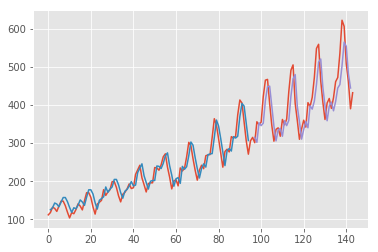

In [30]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()